# HW2

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline

Get the time series for ETH, SOL, AVAX, USDT and FLOW from cryptowat.ch starting from 2021-11-22, hourly data

In [2]:
def get_data(token):
    res = requests.get(
        f'https://api.cryptowat.ch/markets/coinbase-pro/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [3]:
def get_data_FLOW(token):
    res = requests.get(
        f'https://api.cryptowat.ch/markets/kraken/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [4]:
tokens = ['ETH', 'SOL', 'USDT', 'AVAX']

In [5]:
df = pd.concat(get_data(token) for token in tokens)
df = pd.concat([df, get_data_FLOW('FLOW')])

df['chain'] = np.where(df.token.isin(['ETH', 'AAVE', 'COMP']), np.full(df.shape[0], 'ETH'), df.token)
df.set_index('ts', inplace=True)

In [6]:
df

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,ETH
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,ETH
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,ETH
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,ETH
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,ETH
...,...,...,...,...,...,...,...,...
2021-12-23 03:00:00,8.762,8.838,8.762,8.787,9049.150374,7.974868e+04,FLOW,FLOW
2021-12-23 04:00:00,8.741,8.749,8.693,8.741,4147.529975,3.615037e+04,FLOW,FLOW
2021-12-23 05:00:00,8.743,8.762,8.724,8.738,10187.858482,8.910109e+04,FLOW,FLOW


Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

In [7]:
df.groupby('token')['volumeUSD'].sum().to_frame().sort_values('volumeUSD', ascending=False)

,volumeUSD
token,
ETH,2.692272e+10
SOL,8.930835e+09
AVAX,5.037573e+09
USDT,2.471907e+09
FLOW,1.023934e+08


Add a column that calculates the close price ratio between ETH and SOL for each house

In [8]:
df['ratio'] = df.loc[df['token'] == 'ETH', 'close'] / df.loc[df['token'] == 'SOL', 'close'] 

In [9]:
df

,open,high,low,close,volume,volumeUSD,token,chain,ratio
ts,,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,ETH,18.471694
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,ETH,18.736150
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,ETH,18.577985
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,ETH,18.794937
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,ETH,18.891059
...,...,...,...,...,...,...,...,...,...
2021-12-23 03:00:00,8.762,8.838,8.762,8.787,9049.150374,7.974868e+04,FLOW,FLOW,22.038169
2021-12-23 04:00:00,8.741,8.749,8.693,8.741,4147.529975,3.615037e+04,FLOW,FLOW,21.885512
2021-12-23 05:00:00,8.743,8.762,8.724,8.738,10187.858482,8.910109e+04,FLOW,FLOW,22.003510


Change the name of the volume and volumeUSD columns to volumeBase and volumeTerm

In [10]:
df = df.rename(
    columns={
        'volume':'volumeBase',
        'volumeUSD':'volumeTerm'
    }
)

In [11]:
df

,open,high,low,close,volumeBase,volumeTerm,token,chain,ratio
ts,,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,ETH,18.471694
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,ETH,18.736150
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,ETH,18.577985
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,ETH,18.794937
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,ETH,18.891059
...,...,...,...,...,...,...,...,...,...
2021-12-23 03:00:00,8.762,8.838,8.762,8.787,9049.150374,7.974868e+04,FLOW,FLOW,22.038169
2021-12-23 04:00:00,8.741,8.749,8.693,8.741,4147.529975,3.615037e+04,FLOW,FLOW,21.885512
2021-12-23 05:00:00,8.743,8.762,8.724,8.738,10187.858482,8.910109e+04,FLOW,FLOW,22.003510


Create a fat table indexed by the timestamp, and each column is the close price of each token

In [12]:
df_fat = df.loc[df['token'] == 'FLOW', 'close'].rename('FLOW').to_frame()

for token in tokens:
    df_fat = df_fat.join(df.loc[df['token'] == token, 'close'].rename(token).to_frame())

In [13]:
df_fat

,FLOW,ETH,SOL,USDT,AVAX
ts,,,,,
2021-11-22 00:00:00,14.150,4262.99,230.785,1.0012,128.67
2021-11-22 01:00:00,13.621,4234.37,226.000,1.0013,134.85
2021-11-22 02:00:00,13.753,4217.89,227.037,1.0012,132.54
2021-11-22 03:00:00,13.652,4193.47,223.117,1.0011,133.38
2021-11-22 04:00:00,13.581,4168.35,220.652,1.0009,136.29
...,...,...,...,...,...
2021-12-23 03:00:00,8.787,3966.65,179.990,1.0002,122.28
2021-12-23 04:00:00,8.741,3960.84,180.980,1.0002,122.87
2021-12-23 05:00:00,8.738,3949.85,179.510,1.0004,120.39


Calculate the hour by hour log return of the close price of each token

In [14]:
df_fat['FLOW'] = np.log(df_fat['FLOW'].shift(-1) / df_fat['FLOW'])

for token in tokens:
    df_fat[token] = np.log(df_fat[token].shift(-1) / df_fat[token])

In [15]:
df_fat = df_fat[:-1]

In [16]:
df_fat

,FLOW,ETH,SOL,USDT,AVAX
ts,,,,,
2021-11-22 00:00:00,-0.038102,-0.006736,-0.020952,0.0001,0.046912
2021-11-22 01:00:00,0.009644,-0.003900,0.004578,-0.0001,-0.017279
2021-11-22 02:00:00,-0.007371,-0.005806,-0.017417,-0.0001,0.006318
2021-11-22 03:00:00,-0.005214,-0.006008,-0.011109,-0.0002,0.021583
2021-11-22 04:00:00,-0.014014,-0.002472,-0.015161,-0.0001,-0.031832
...,...,...,...,...,...
2021-12-23 02:00:00,0.001025,0.002587,-0.001388,-0.0002,0.002948
2021-12-23 03:00:00,-0.005249,-0.001466,0.005485,0.0000,0.004813
2021-12-23 04:00:00,-0.000343,-0.002779,-0.008156,0.0002,-0.020390


Calculate the correlation of the tokens using the table above

In [17]:
from pandas.plotting import scatter_matrix, lag_plot, autocorrelation_plot

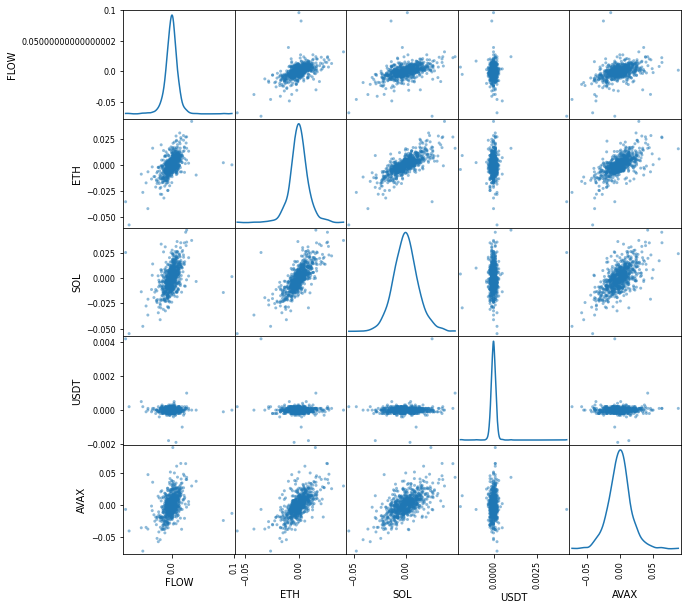

In [18]:
r = scatter_matrix(df_fat, figsize = (10,10), diagonal='kde')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

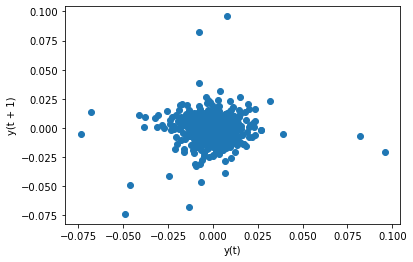

In [19]:
lag_plot(df_fat.FLOW)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

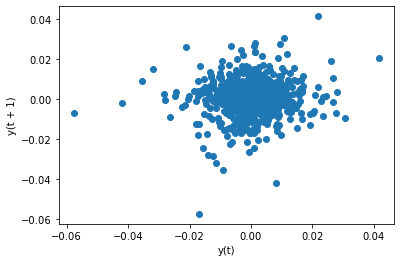

In [20]:
lag_plot(df_fat.ETH)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

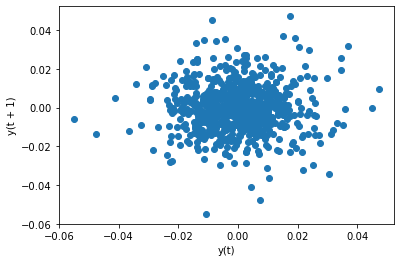

In [21]:
lag_plot(df_fat.SOL)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

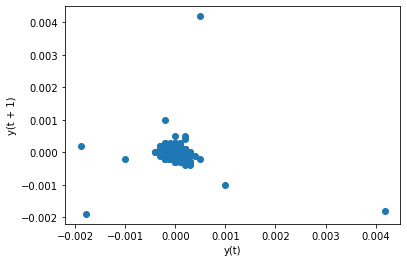

In [22]:
lag_plot(df_fat.USDT)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

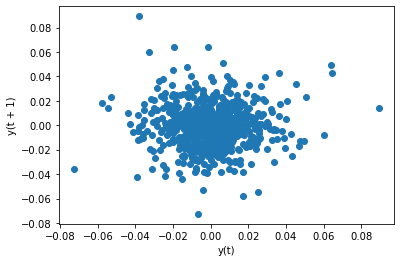

In [23]:
lag_plot(df_fat.AVAX)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

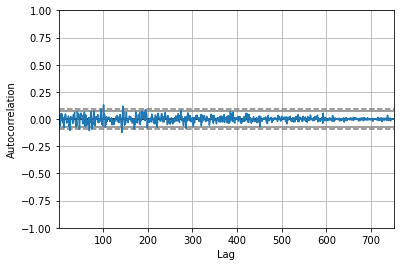

In [24]:
autocorrelation_plot(df_fat.FLOW)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

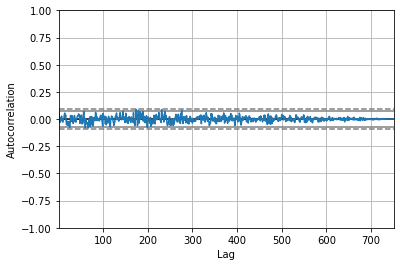

In [25]:
autocorrelation_plot(df_fat.ETH)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

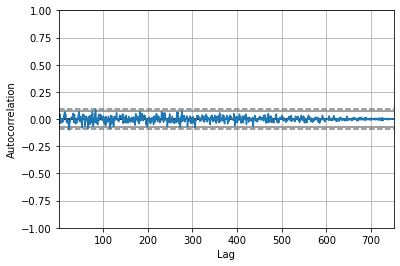

In [26]:
autocorrelation_plot(df_fat.SOL)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

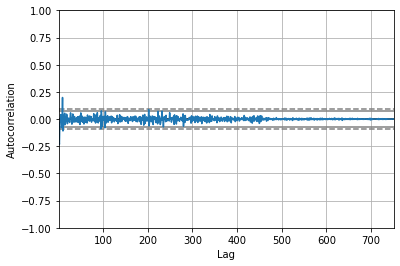

In [27]:
autocorrelation_plot(df_fat.USDT)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

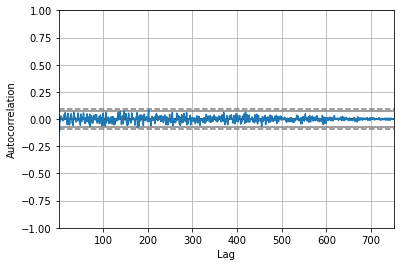

In [28]:
autocorrelation_plot(df_fat.AVAX)

Visualize the correlation in a matplpotlib plot

Text(0.5, 1.0, 'Correlation between Close Prices')

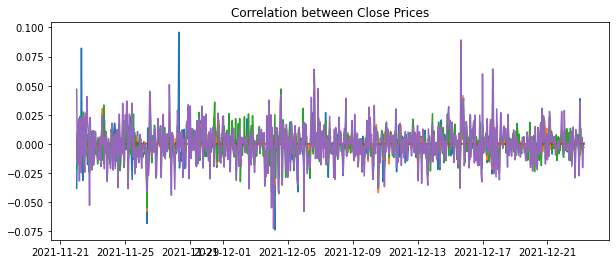

In [29]:
plt.figure(figsize=(10, 4))

plt.plot(df_fat.reset_index().ts, df_fat.FLOW)
plt.plot(df_fat.reset_index().ts, df_fat.ETH)
plt.plot(df_fat.reset_index().ts, df_fat.SOL)
plt.plot(df_fat.reset_index().ts, df_fat.USDT)
plt.plot(df_fat.reset_index().ts, df_fat.AVAX)

plt.title('Correlation between Close Prices')